# L03-4-SQL Import
## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here.



# SQL Import
In this exercise, we will connect to a SQL database, browse the data programmatically and then export the data into R data frames. We will use the odbc and DBI libraries to connect to SQL Server. These libraries work well with the tidyverse dplyr package.

The database authorization level is read-only for the credentials used in this exercise. However, these packages provide the capability to alter the database data and the database itself.


## R Features
* library()
* dbconnect()
* print()
* str()
* dbListTables()
* sort()
* head()
* dbListFields()
* dbGetQuery()
* select()
* everything()
* arrange()
* desc()
* dbDisconnect()
* ggplot()
* geom_bar()


## Datasets
* AdventureWorks


In [4]:
# Load libraries
library('odbc') # odbc
library('DBI') # DBI
library('tidyverse') # tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Database connection information
There are a few bits of information you will want to have handy in order to import data from SQL. 
* Driver library: Driver library is the database driver that is compatible with your database. We will use 'odbc' in this exercise. You would change this to match your needs and perhaps have to load a different library than odbc for your connection.
* Driver: Driver name is part of the connection string information. We will use 'SQL Server' in this exercise. You would change this to match your needs.
* Server: Server name is the name of the database server or server instance
* Database: Database name is the name of the database within the server you want to connect to
* Authentication credentials: Authentication credentials is the username and password to allow access to the database. 



In [5]:
# Connection string info
# Already completed, just run the code block
driver_name <- "ODBC Driver 13 for SQL Server"
server_name <- "uwc-sqlserver.clients.uw.edu"
database_name <- "AdventureWorks2016CTP3" 
user_id <- "sqlstudentreader"
password <- "PA6aX2gAhe4hE!ru$6atru"

## dbConnect()
Connects to a ODBC compatible database. The required first parameter, drv is the driver library that you want to use. In our case it will be odbc::odbc() which means, call the odbc() function found in the odbc library.

dbConnect(drv, dsn = NULL, ..., timezone = "UTC",
  encoding = "", driver = NULL, server = NULL, database = NULL,
  uid = NULL, pwd = NULL, .connection_string = NULL)

In [6]:
# View help on dbConnect()
?dbConnect()

Warning message in .helpForCall(topicExpr, parent.frame()):
“no method defined for function ‘dbConnect’ and signature ‘drv = "missing"’”

ERROR: Error in .helpForCall(topicExpr, parent.frame()): no documentation for function ‘dbConnect’ and signature ‘drv = "missing"’


In [7]:
# Connect to the database
# Store connection in conn variable
conn <- dbConnect(odbc::odbc(), 
                  driver = driver_name, 
                  server = server_name, 
                  database = database_name,
                  uid = user_id,
                  pwd = password)

# Print the connection object
print(conn)

<OdbcConnection> sqlstudentreader@UWC-SQLSERVER
  Database: AdventureWorks2016CTP3
  Microsoft SQL Server Version: 13.00.4259


Notice in the above output that it returned similar information to what you passed into dbConnect, namely the driver, server, and database information. You can additionally see the driver version.

## str()
Compactly displays the internal structure of an R object, a diagnostic function and an alternative to summary(). Ideally, only one line for each ‘basic’ structure is displayed. The idea is to give reasonable output for any R object. 

You can use str() on any R variable making it universally useful.

In [8]:
# View help on str()
?str()

In [9]:
# Print connection details
# using str()
str(conn)

Formal class 'Microsoft SQL Server' [package ".GlobalEnv"] with 4 slots
  ..@ ptr     :<externalptr> 
  ..@ quote   : chr "\""
  ..@ info    :List of 13
  .. ..$ dbname               : chr "AdventureWorks2016CTP3"
  .. ..$ dbms.name            : chr "Microsoft SQL Server"
  .. ..$ db.version           : chr "13.00.4259"
  .. ..$ username             : chr "sqlstudentreader"
  .. ..$ host                 : chr ""
  .. ..$ port                 : chr ""
  .. ..$ sourcename           : chr ""
  .. ..$ servername           : chr "UWC-SQLSERVER"
  .. ..$ drivername           : chr "libmsodbcsql-13.1.so.9.2"
  .. ..$ odbc.version         : chr "03.52"
  .. ..$ driver.version       : chr "13.01.0009"
  .. ..$ odbcdriver.version   : chr "03.52"
  .. ..$ supports.transactions: logi TRUE
  .. ..- attr(*, "class")= chr [1:3] "Microsoft SQL Server" "driver_info" "list"
  ..@ encoding: chr ""


Notice in the output above, that str() provides additional details including the DLL of the driver, and the versions of various components. This may be useful in troubleshooting connection issues.

## dbListTables()
Lists remote tables found when using the established database connection.

dbListTables(conn, ...)

In [10]:
# View help on dbListTables()
?dbListTables

In [11]:
# List the alphabetically first 50 
# table objects in the database
# Sorted alphabetically
# Hint: head(), sort()
conn %>% dbListTables %>% 
   sort() %>% 
   head(50)

[1] "Address"                                 
 [2] "AddressType"                             
 [3] "all_columns"                             
 [4] "all_objects"                             
 [5] "all_parameters"                          
 [6] "all_sql_modules"                         
 [7] "all_views"                               
 [8] "allocation_units"                        
 [9] "assemblies"                              
[10] "assembly_files"                          
[11] "assembly_modules"                        
[12] "assembly_references"                     
[13] "assembly_types"                          
[14] "asymmetric_keys"                         
[15] "availability_databases_cluster"          
[16] "availability_group_listener_ip_addresses"
[17] "availability_group_listeners"            
[18] "availability_groups"                     
[19] "availability_groups_cluster"             
[20] "availability_read_only_routing_lists"    
[21] "availability_replicas"                   
[22] "AWBuildVersion"                          
[23] "backup_devices"                          
[24] "BillOfMaterials"                         
[25] "BusinessEntity"                          
[26] "BusinessEntityAddress"                   
[27] "BusinessEntityContact"                   
[28] "certificates"                            
[29] "change_tracking_databases"               
[30] "change_tracking_tables"                  
[31] "check_constraints"                       
[32] "CHECK_CONSTRAINTS"                       
[33] "COLUMN_DOMAIN_USAGE"                     
[34] "column_encryption_key_values"            
[35] "column_encryption_keys"                  
[36] "column_master_keys"                      
[37] "COLUMN_PRIVILEGES"                       
[38] "column_store_dictionaries"               
[39] "column_store_row_groups"                 
[40] "column_store_segments"                   
[41] "column_type_usages"                      
[42] "column_xml_schema_collection_usages"     
[43] "columns"                                 
[44] "COLUMNS"                                 
[45] "computed_columns"                        
[46] "configurations"                          
[47] "CONSTRAINT_COLUMN_USAGE"                 
[48] "CONSTRAINT_TABLE_USAGE"                  
[49] "ContactType"                             
[50] "conversation_endpoints"

Notice the output above lists tables along with other objects. This potentially could be a long list. Using another tool to explore the database as well as develop the SQL query might be useful. 

## dbListFields()
Lists field names of a remote table. Field names is another term for column names.

dbListFields(conn, name, ...)

In [ ]:
# View help on dbListFields()
?dbListFields

In [12]:
# List the columns 
# for table: Customer
conn %>% 
   dbListFields("Customer")

[1] "CustomerID"    "PersonID"      "StoreID"       "TerritoryID"  
[5] "AccountNumber" "rowguid"       "ModifiedDate"

The above is the equivalant to the names() function, providing the column names of the table. This is useful to determine what columns we might want to export using our SELECT statement, or of course we can use SELECT * and get them all and sort them out in R later if we choose.

## dbGetQuery()
Send query, retrieve results and then clear result set. This function is for SELECT queries only. Some backends may support data manipulation statements through this function for compatibility reasons. However callers are strongly advised to use dbExecute for data manipulation statements.

dbGetQuery(conn, statement, ...)

In [23]:
# View help on dbGetQuery()
?dbGetQuery

In [14]:
# Create a SQL SELECT statement
# select the first 10 rows of data for all columns
# Table: Sales.Customer
# First store the query text in a variable sql_dim_date
# Hint: SQL TOP N
sql_customer <- 
"SELECT Top 10 * 
FROM Sales.Customer"

# Second, execute the query
# store result in df_customer
df_customer <- conn %>% 
   dbGetQuery(sql_customer) %>%
   head(10)  # Optional if part of SQL query

# Glimpse result
glimpse(df_customer)

Observations: 10
Variables: 7
$ CustomerID    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ PersonID      <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA
$ StoreID       <int> 934, 1028, 642, 932, 1026, 644, 930, 1024, 620, 928
$ TerritoryID   <int> 1, 1, 4, 4, 4, 4, 1, 5, 5, 6
$ AccountNumber <chr> "AW00000001", "AW00000002", "AW00000003", "AW00000004",…
$ rowguid       <chr> "3F5AE95E-B87D-4AED-95B4-C3797AFCB74F", "E552F657-A9AF-…
$ ModifiedDate  <dttm> 2014-09-12 11:15:07, 2014-09-12 11:15:07, 2014-09-12 1…


* Notice that it is simple to execute SQL SELECT statements and return the results as a data frame. 
* Notice that the data types map well from SQL to R since R is less restrictive than SQL.  
* Notice that the SQL statement can be a variable and thus we can programmatically create and edit this code to create what is referred to as 'dynamic SQL'. This is where the power of programming comes in for automation as well as adjusting what is queried based upon other data or configurations.

## SQL SELECT 
There is full capabilities with the SQL SELECT statement. It doesn't have to be limited to simple queries. 

Let's try returning specific columns and filtering on some rows.

In [26]:
?select

In [28]:
# Import Sales.SalesPerson
# returning only the first 5 columns 
# and top 10 rows
# with Bonus > 0
# sorted by CommissionPct from high to low
# Hint: select(1:5)
sql_sales_person <- "SELECT top 10 *
FROM Sales.SalesPerson
WHERE Sales.SalesPerson.Bonus > 0
ORDER BY Sales.SalesPerson.CommissionPct Desc"

df_sales_person <- conn %>% 
   dbGetQuery(sql_sales_person)%>%
    select(1:5)

# Glimpse result
glimpse(df_sales_person)

Observations: 10
Variables: 5
$ BusinessEntityID <int> 289, 284, 286, 288, 290, 282, 277, 276, 283, 275
$ TerritoryID      <int> 10, 1, 9, 8, 7, 6, 3, 4, 1, 2
$ SalesQuota       <dbl> 250000, 300000, 250000, 250000, 250000, 250000, 2500…
$ Bonus            <dbl> 5150, 3900, 5650, 75, 985, 5000, 2500, 2000, 3500, 4…
$ CommissionPct    <dbl> 0.020, 0.019, 0.018, 0.018, 0.016, 0.015, 0.015, 0.0…


Repeat the above task but instead bring in all the data from the SQL statement and perform the manipulation using R

In [31]:
?arrange

In [33]:
# Import Sales.SalesPerson
# returning only the first 5 columns 
# and top 10 rows
# with Bonus > 0
# sorted by CommissionPct from high to low
# Hint: select(1:5), filter(), arrange(), desc(), head()
sql_sales_person <- 
"SELECT *  
FROM Sales.SalesPerson"

df_sales_person <- conn %>% 
   dbGetQuery(sql_sales_person) %>%
   select(1:5) %>%  
   filter(Bonus > 0) %>%  
   arrange(desc(CommissionPct)) %>% 
   head(n = 10)  

# Glimpse result
glimpse(df_sales_person)

Observations: 10
Variables: 5
$ BusinessEntityID <int> 289, 284, 286, 288, 290, 276, 277, 282, 275, 283
$ TerritoryID      <int> 10, 1, 9, 8, 7, 4, 3, 6, 2, 1
$ SalesQuota       <dbl> 250000, 300000, 250000, 250000, 250000, 250000, 2500…
$ Bonus            <dbl> 5150, 3900, 5650, 75, 985, 2000, 2500, 5000, 4100, 3…
$ CommissionPct    <dbl> 0.020, 0.019, 0.018, 0.018, 0.016, 0.015, 0.015, 0.0…


Are the results from using SQL SELECT and R identical? If not, why not?

In [45]:
?everything

In [51]:
# Create a SELECT statement 
# that returns all rows
# for table Sales.SalesOrderDetail
# Store as sql_sales_order_detail
sql_sales_order_detail <- 
"SELECT *
  FROM Sales.SalesOrderDetail"

# Execute the query 
# Store the result in df_usa
df_sales_order_detail <- conn %>%
   dbGetQuery(sql_sales_order_detail)

# Glimpse result
glimpse(df_sales_order_detail) 

# Print top 5 results of the first 5 columns
# with OrderQty being the first column
# Hint: select(), everything(), arrange(), head()
df_sales_order_detail %>% 
   select(1:5)%>%
    select(OrderQty, everything())%>%
    arrange(desc(OrderQty)) %>%
    head(n = 10)# May need to use several functions, see hint above

Observations: 121,317
Variables: 11
$ SalesOrderID          <int> 43659, 43659, 43659, 43659, 43659, 43659, 43659…
$ SalesOrderDetailID    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ CarrierTrackingNumber <chr> "4911-403C-98", "4911-403C-98", "4911-403C-98",…
$ OrderQty              <int> 1, 3, 1, 1, 1, 2, 1, 3, 1, 6, 2, 4, 1, 1, 1, 1,…
$ ProductID             <int> 776, 777, 778, 771, 772, 773, 774, 714, 716, 70…
$ SpecialOfferID        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ UnitPrice             <dbl> 2024.9940, 2024.9940, 2024.9940, 2039.9940, 203…
$ UnitPriceDiscount     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ LineTotal             <dbl> 2024.9940, 6074.9820, 2024.9940, 2039.9940, 203…
$ rowguid               <chr> "B207C96D-D9E6-402B-8470-2CC176C42283", "7ABB60…
$ ModifiedDate          <dttm> 2011-05-31, 2011-05-31, 2011-05-31, 2011-05-31…


OrderQty,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,ProductID
<int>,<int>,<int>,<chr>,<int>
44,50270,32300,A828-45A2-8B,863
41,67266,95437,3CFE-46C9-88,869
40,51783,41192,B7A2-49BC-89,867
40,57186,63156,EF93-4946-97,869
39,48089,22231,EACD-4BB9-97,863
38,67266,95433,3CFE-46C9-88,867
36,51109,36271,0EFE-4639-BE,864
36,51783,41188,B7A2-49BC-89,869
35,46610,10831,B7D1-4895-B6,863


## dbDisconnect()
Disconnect (close) a connection. This closes the connection, discards all pending work, and frees resources (e.g., memory, sockets).

dbDisconnect(conn, ...)

In [ ]:
# View help on dbDisconnect()
?dbDisconnect

In [52]:
# Close the database connection
dbDisconnect(conn)

Notice it returned TRUE meaning the connection was successfully closed.

## Code Recap
Let's put all the code in one block to better see the pattern.

In [57]:
# Load libraries
library('odbc') # odbc
library('DBI') # DBI
library('tidyverse') # tidyverse

# Connection string info
driver_name <- "ODBC Driver 13 for SQL Server"
server_name <- "69.91.210.142" 
database_name <- "AdventureWorks2016CTP3" 
user_id <- "sqlstudentreader"
password <- "PA6aX2gAhe4hE!ru$6atru"

# Connect to the database
conn <- dbConnect(odbc::odbc(), 
                  driver = driver_name, 
                  server = server_name, 
                  database = database_name,
                  uid = user_id,
                  pwd = password)

# List the first 20 table objects in the database
conn %>% 
   dbListTables()%>% 
   head(20)

# List the columns 
# for table: Customer
# limit to the first 10 columns
conn %>% 
   dbListFields("Customer") %>% 
   head(10)

# Create a SELECT statement 
# that returns all rows
# for table Sales.SalesOrderDetail
# Store as sql_sales_order_detail
sql_sales_order_detail <- 
"SELECT *
  FROM Sales.SalesOrderDetail"

# Execute the query 
# Store the result in df_top_orders
df_sales_order_detail <- conn %>%
   dbGetQuery(sql_sales_order_detail)

# Glimpse result
glimpse(df_sales_order_detail)

# Print top 5 highest quantity orders and the first 5 columns
# with OrderQty being the first column
# Hint: select(), everything(), arrange(), head()
df_sales_order_detail %>% 
   select(1:5)%>%
    select(OrderQty, everything())%>%
    arrange(desc(OrderQty))%>%
    head(5)# See hint above

# Close the database connection
dbDisconnect(conn)

[1] "AWBuildVersion"            "DatabaseLog"              
 [3] "ErrorLog"                  "DemoSalesOrderDetailSeed" 
 [5] "DemoSalesOrderHeaderSeed"  "Department"               
 [7] "Employee"                  "Employee_Temporal"        
 [9] "Employee_Temporal_History" "EmployeeDepartmentHistory"
[11] "EmployeePayHistory"        "JobCandidate"             
[13] "Shift"                     "Address"                  
[15] "AddressType"               "BusinessEntity"           
[17] "BusinessEntityAddress"     "BusinessEntityContact"    
[19] "ContactType"               "CountryRegion"

[1] "CustomerID"    "PersonID"      "StoreID"       "TerritoryID"  
[5] "AccountNumber" "rowguid"       "ModifiedDate"

Observations: 121,317
Variables: 11
$ SalesOrderID          <int> 43659, 43659, 43659, 43659, 43659, 43659, 43659…
$ SalesOrderDetailID    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ CarrierTrackingNumber <chr> "4911-403C-98", "4911-403C-98", "4911-403C-98",…
$ OrderQty              <int> 1, 3, 1, 1, 1, 2, 1, 3, 1, 6, 2, 4, 1, 1, 1, 1,…
$ ProductID             <int> 776, 777, 778, 771, 772, 773, 774, 714, 716, 70…
$ SpecialOfferID        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ UnitPrice             <dbl> 2024.9940, 2024.9940, 2024.9940, 2039.9940, 203…
$ UnitPriceDiscount     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ LineTotal             <dbl> 2024.9940, 6074.9820, 2024.9940, 2039.9940, 203…
$ rowguid               <chr> "B207C96D-D9E6-402B-8470-2CC176C42283", "7ABB60…
$ ModifiedDate          <dttm> 2011-05-31, 2011-05-31, 2011-05-31, 2011-05-31…


OrderQty,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,ProductID
<int>,<int>,<int>,<chr>,<int>
44,50270,32300,A828-45A2-8B,863
41,67266,95437,3CFE-46C9-88,869
40,51783,41192,B7A2-49BC-89,867
40,57186,63156,EF93-4946-97,869
39,48089,22231,EACD-4BB9-97,863


## Analyze Sales Orders
Once you import a table of data, it may be helpful to get a sense of the data from a graphical perspective. 

Let's plot the frequency of the order quantities.  

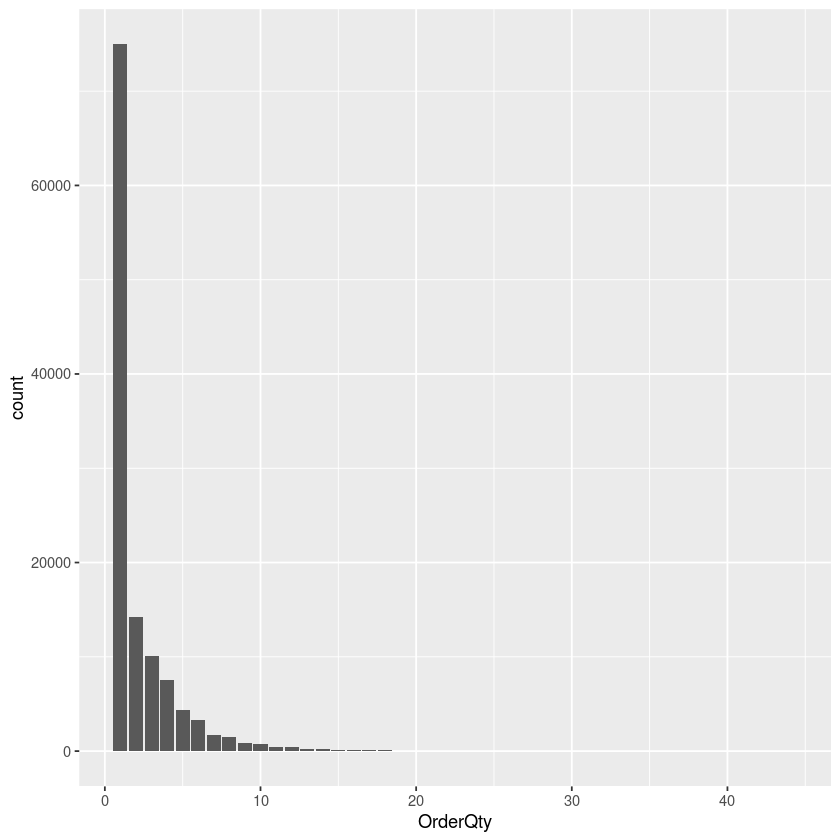

In [58]:
# Create a bar plot of OrderQty
# Create a bar plot of OrderQty
df_sales_order_detail %>% 
   ggplot(aes(OrderQty)) + 
      geom_bar()

## Summary
odbc and DBI packages enable you to execute SQL SELECT statements with the results returned as data frames.